# Phase 1 Implementation


# **Data Exploration and Preprocessing**






Import needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge ,  Lasso, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error , silhouette_score, davies_bouldin_score
from sklearn.neighbors import KNeighborsRegressor , NearestCentroid
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


1.   Data Loading and Cleaning




In [2]:
dataset = pd.read_csv('/content/Loan(4).csv')

In [3]:
dataset

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [4]:
dataset.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [5]:
dataset.shape

(20000, 36)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [7]:
dataset.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [8]:
duplicates = dataset.duplicated()
print(duplicates.sum())

0


2.  Exploratory Data Analysis



In [9]:
#Quantitive data
quantitive = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
quantitive_data = dataset[quantitive]
quantitive_data

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,36,3,673,0.101288,5,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,33,25818,36,5,414,0.471818,2,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,20,37033,72,3,512,0.216596,3,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,36,14760,72,3,986,0.364758,4,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [10]:
#Qualtitive data
qualitative = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
qualitative_data = dataset[qualitative]
qualitative_data


,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,Master,Married,Own,Home
1,2018-01-02,Employed,Associate,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,Bachelor,Married,Rent,Education
3,2018-01-04,Employed,High School,Single,Mortgage,Home
4,2018-01-05,Employed,Associate,Married,Mortgage,Debt Consolidation
...,...,...,...,...,...,...
19995,2072-09-29,Employed,High School,Married,Rent,Auto
19996,2072-09-30,Employed,Associate,Married,Rent,Debt Consolidation
19997,2072-10-01,Employed,Bachelor,Married,Mortgage,Home
19998,2072-10-02,Employed,High School,Married,Own,Debt Consolidation


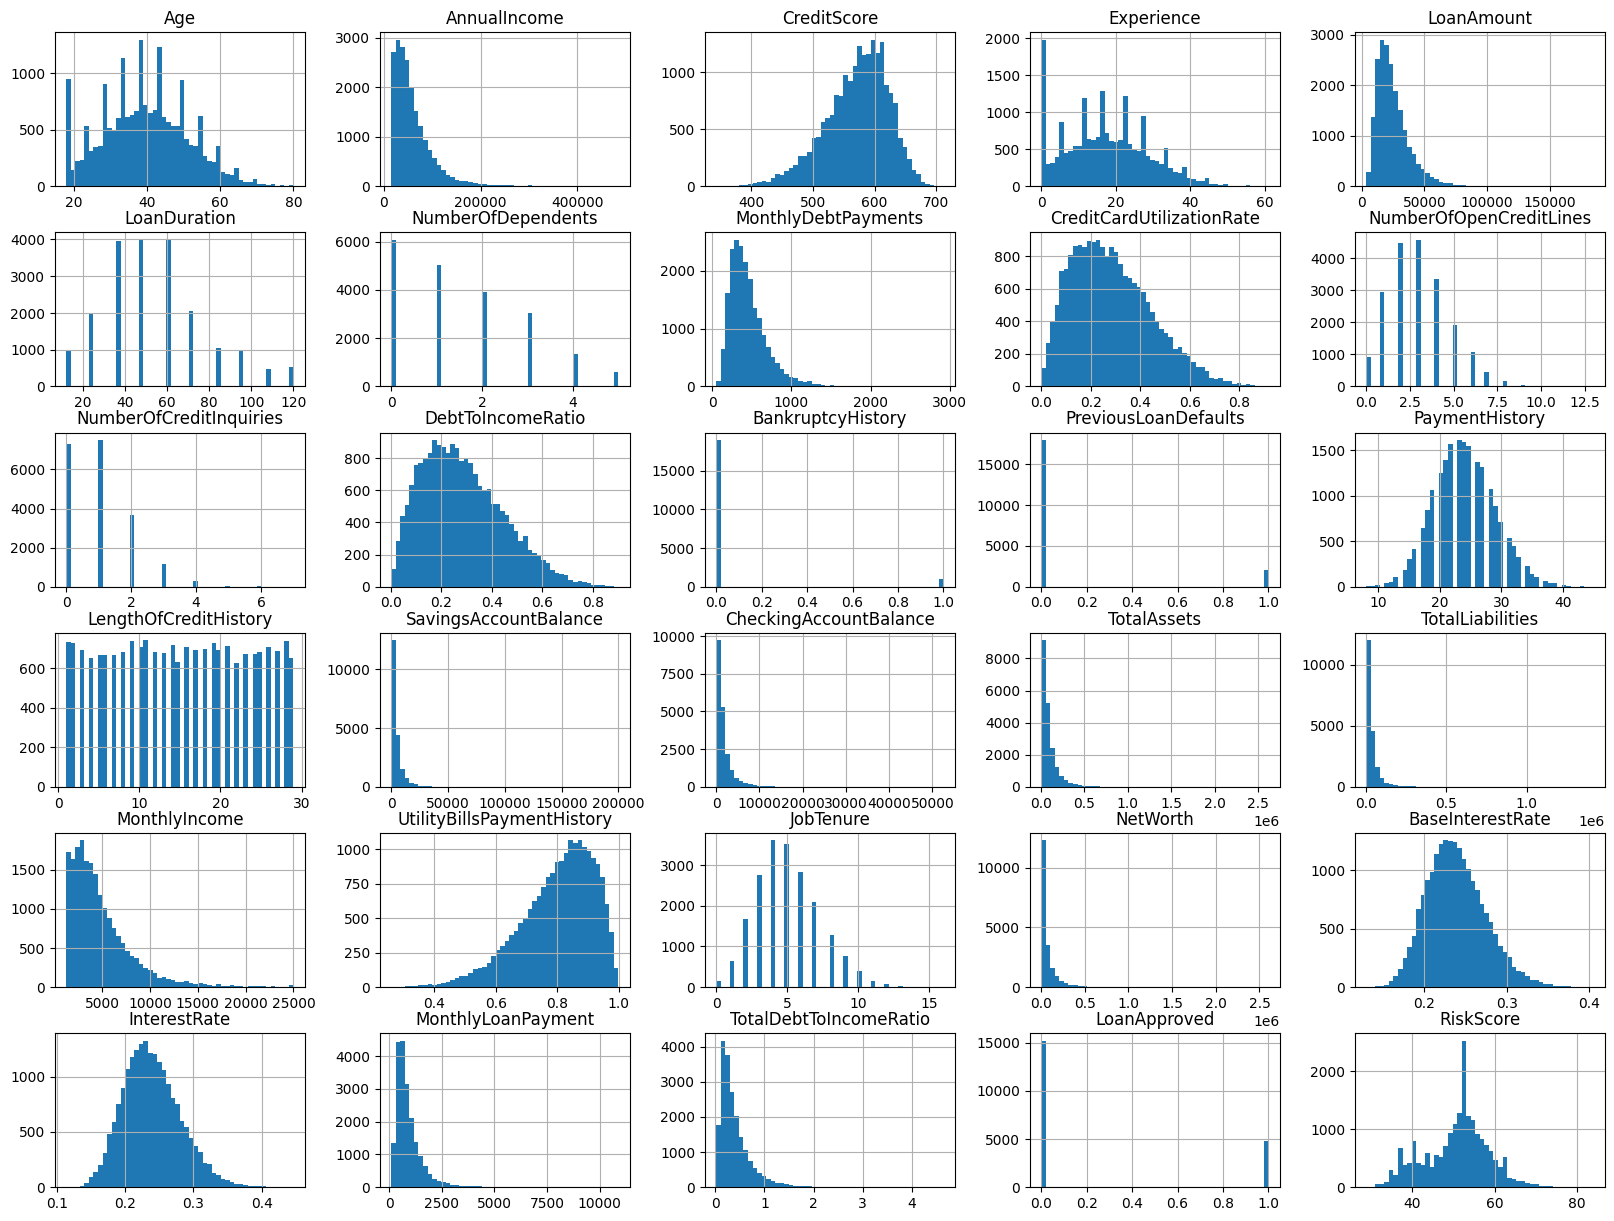

In [11]:
#Visualizing Quantitive
quantitive_data.hist(bins=50, figsize=(20,15))
plt.show()

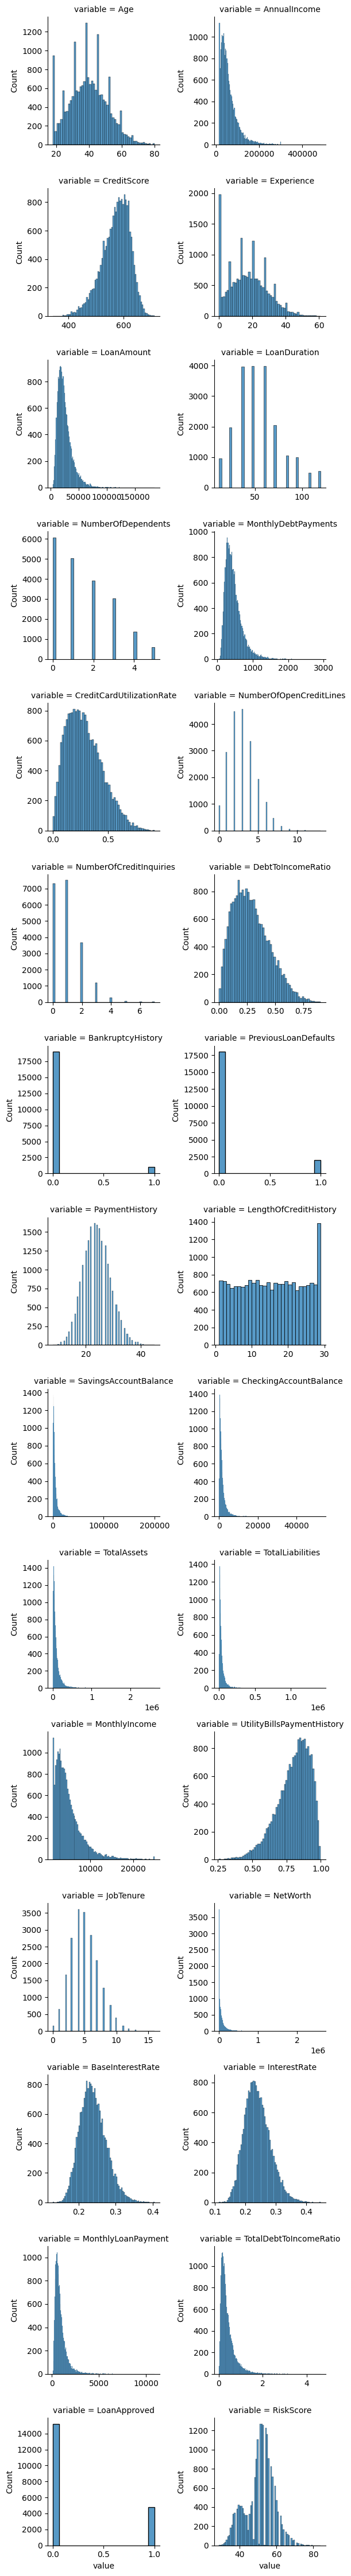

In [12]:
f = pd.melt(dataset, value_vars = quantitive)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

In [13]:
quantitative_data = dataset[quantitive+['RiskScore']]
corr_matrix = quantitive_data.corr()
corr_matrix["RiskScore"].sort_values(ascending=False)

,RiskScore
RiskScore,1.000000
BankruptcyHistory,0.377578
TotalDebtToIncomeRatio,0.342643
DebtToIncomeRatio,0.326500
InterestRate,0.268203
PreviousLoanDefaults,0.258659
BaseInterestRate,0.256233
LoanAmount,0.137981
MonthlyLoanPayment,0.115501
CreditCardUtilizationRate,0.108758


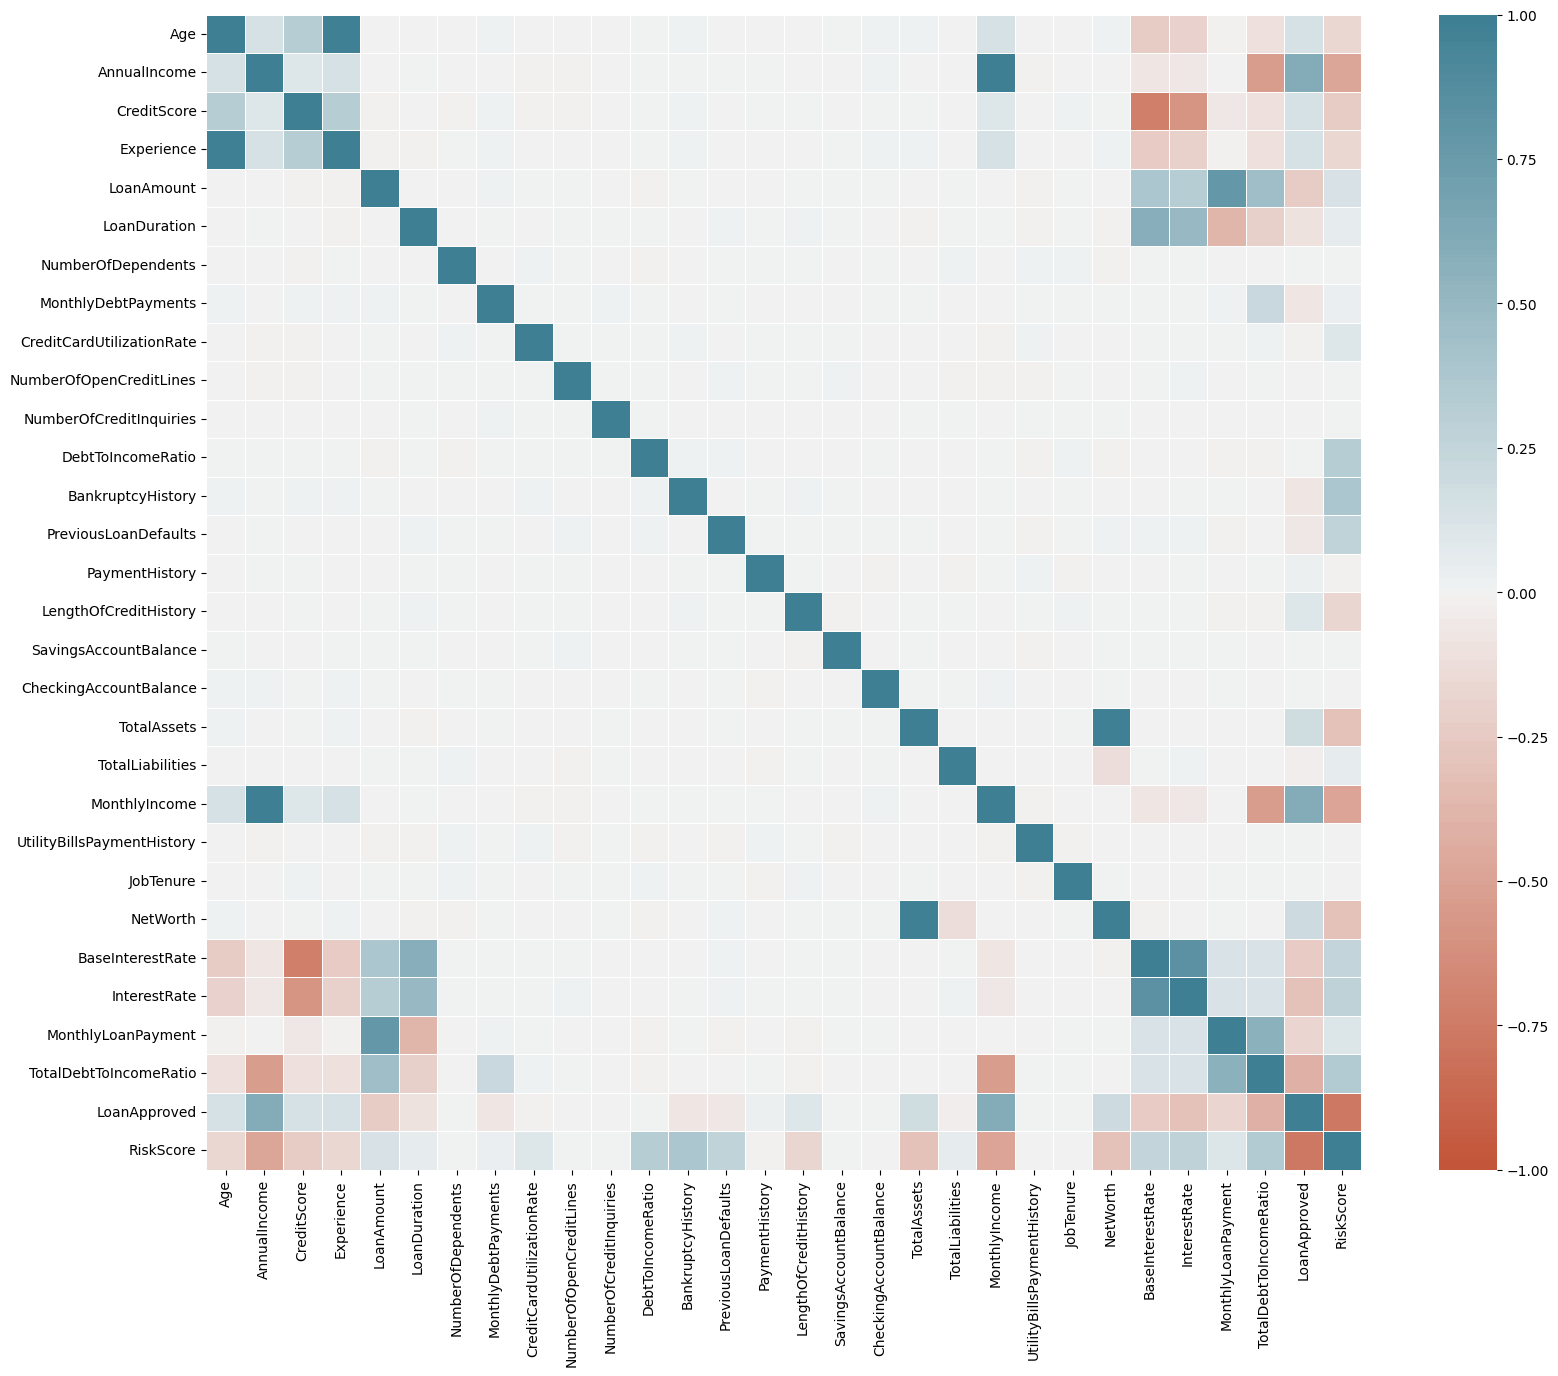

In [14]:
#Visualize correlation
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True ,
    linewidths=0.5
)

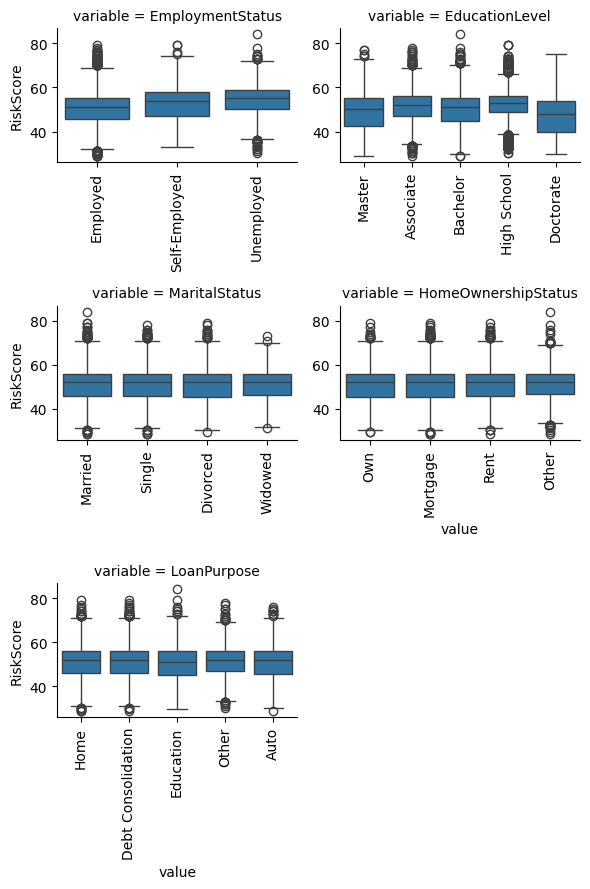

In [15]:
#Visualizing Qualitative
qualitative = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus','HomeOwnershipStatus','LoanPurpose']
for c in qualitative:
    dataset[c] = dataset[c].astype('category')
    if dataset[c].isnull().any():
        dataset[c] = dataset[c].cat.add_categories('MISSING')
        dataset[c] = dataset[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, **kwargs)
    plt.xticks(rotation=90)

f = pd.melt(dataset, id_vars=['RiskScore'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "RiskScore")

plt.tight_layout()
plt.show()

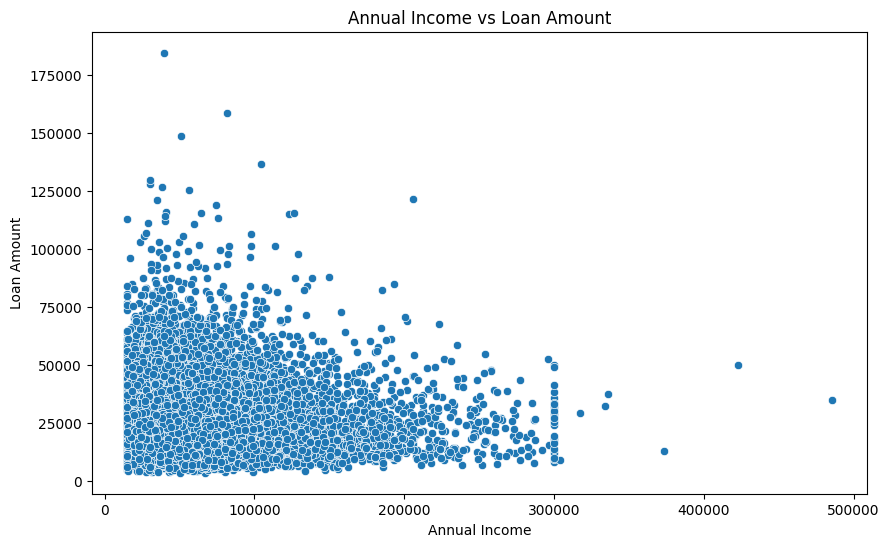

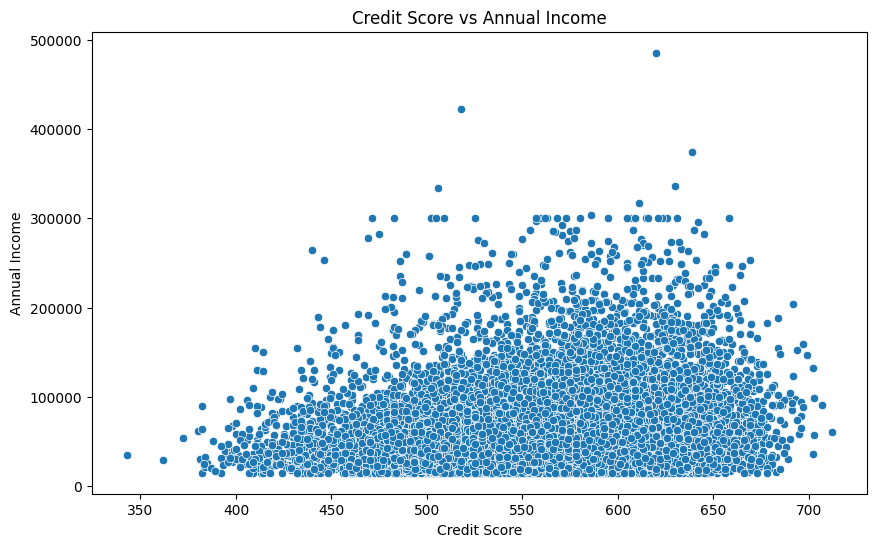

In [16]:
# Scatter plot for AnnualIncome vs LoanAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='LoanAmount', data=dataset)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Scatter plot for CreditScore vs AnnualIncome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='AnnualIncome', data=dataset)
plt.title('Credit Score vs Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()



3.Feature Engineering



In [17]:
dataset.insert(len(dataset.columns)-1, 'LoanToIncomeRatio', dataset['LoanAmount'] / dataset['AnnualIncome'])
dataset

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,LoanToIncomeRatio,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,0.329228,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,0.655897,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,0.432841,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,0.548579,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,0.088937,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,0.812492,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,0.524266,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,0.756424,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,0.359781,59.0


In [18]:
# Drop the columns
#BaseInterestRate: Interset rate column gave the same meaning so I dropped it
#NumberOfDependents: Don't influence the regression results
#UtilityBillsPaymentHistory: Have the same meaning with CreditScore
#JobTenure: Both Indicates the same result
dataset = dataset.drop(columns=['ApplicationDate','BaseInterestRate', 'NumberOfDependents', 'UtilityBillsPaymentHistory', 'JobTenure'])
dataset

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,HomeOwnershipStatus,...,TotalAssets,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,LoanToIncomeRatio,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,Own,...,146111,19183,3329.000000,126928,0.227590,419.805992,0.181077,0,0.329228,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,Mortgage,...,53204,9595,3309.083333,43609,0.201077,794.054238,0.389852,0,0.655897,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,Rent,...,25176,128874,3393.666667,5205,0.212548,666.406688,0.462157,0,0.432841,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,Mortgage,...,104822,5370,5757.000000,99452,0.300911,1047.506980,0.313098,0,0.548579,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,Mortgage,...,244305,17286,8605.333333,227019,0.175990,330.179140,0.070210,1,0.088937,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,Rent,...,80969,25642,2515.000000,55327,0.195574,905.767712,0.627741,0,0.812492,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,Rent,...,69571,5569,4103.833333,64002,0.199168,958.395633,0.334418,0,0.524266,54.0
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,Mortgage,...,108316,4653,4079.833333,103663,0.226766,945.427454,0.357227,0,0.756424,45.0
19998,60,41025,560,Employed,High School,36,14760,72,Married,Own,...,22085,11485,3418.750000,10600,0.264873,411.168284,0.408678,0,0.359781,59.0


In [19]:
label_encoder = LabelEncoder()
categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus','HomeOwnershipStatus','LoanPurpose']
for column in categorical_columns:
    if column in dataset.columns:
        dataset[column] = label_encoder.fit_transform(dataset[column])
dataset

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,HomeOwnershipStatus,...,TotalAssets,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,LoanToIncomeRatio,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,...,146111,19183,3329.000000,126928,0.227590,419.805992,0.181077,0,0.329228,49.0
1,38,39709,628,0,0,15,26045,48,2,0,...,53204,9595,3309.083333,43609,0.201077,794.054238,0.389852,0,0.655897,52.0
2,47,40724,570,0,1,26,17627,36,1,3,...,25176,128874,3393.666667,5205,0.212548,666.406688,0.462157,0,0.432841,52.0
3,58,69084,545,0,3,34,37898,96,2,0,...,104822,5370,5757.000000,99452,0.300911,1047.506980,0.313098,0,0.548579,54.0
4,37,103264,594,0,0,17,9184,36,1,0,...,244305,17286,8605.333333,227019,0.175990,330.179140,0.070210,1,0.088937,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,0,3,19,24521,36,1,3,...,80969,25642,2515.000000,55327,0.195574,905.767712,0.627741,0,0.812492,55.0
19996,56,49246,567,0,0,33,25818,36,1,3,...,69571,5569,4103.833333,64002,0.199168,958.395633,0.334418,0,0.524266,54.0
19997,44,48958,645,0,1,20,37033,72,1,0,...,108316,4653,4079.833333,103663,0.226766,945.427454,0.357227,0,0.756424,45.0
19998,60,41025,560,0,3,36,14760,72,1,2,...,22085,11485,3418.750000,10600,0.264873,411.168284,0.408678,0,0.359781,59.0


In [20]:
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# **Model Implementation**

1.Linear Regression



In [21]:
#prepare data
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]
X_train, X_test ,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
#define Model , fit data
Linear_Model =LinearRegression() #define the model
Linear_Model.fit(X_train,Y_train) #give the model the training data
y_test_predict = Linear_Model.predict(X_test)

In [23]:
#Evaluting the Model
mse_test = mean_squared_error(Y_test,y_test_predict)
print("MSE_Test:",mse_test)

MSE_Test: 0.0013320899554200656


In [24]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [25]:
rmse_test = calculate_rmse(Y_test,y_test_predict)
print("RMSE_Test:",rmse_test)

RMSE_Test: 0.036497807542646525


In [26]:
r2_test = r2_score(Y_test,y_test_predict)
print("R2_test:",r2_test)

R2_test: 0.934625584713777


In [27]:
mae_test = mean_absolute_error(Y_test,y_test_predict)
print("MAE_Test:",mae_test)

MAE_Test: 0.027654028181586566


2.KNN Regressor



In [28]:
#Try Diffrent K values
k_values=range(1,15)
mse_test_values=[]
for k in k_values:
  knn_model=KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train,Y_train)
  y_pred_test=knn_model.predict(X_test)
  mse_test = mean_squared_error(Y_test,y_pred_test)
  mse_test_values.append(mse_test)


print("MSE_TEST VALUES:",mse_test_values)

MSE_TEST VALUES: [0.00479494197647553, 0.0036073189062171816, 0.0031952842394221566, 0.002979812580405902, 0.002849379463348036, 0.002769475822802166, 0.0027258340915131017, 0.002713435467289566, 0.002698918002753857, 0.002672888737922705, 0.0026448558774720917, 0.0026476467507993186, 0.0026581340672923123, 0.0026698709138664916]


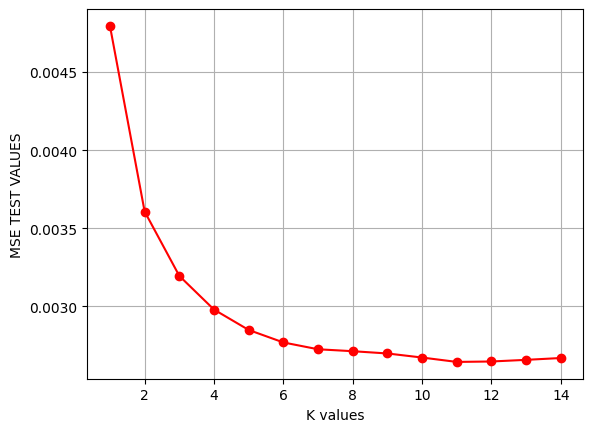

In [29]:
plt.plot(k_values,mse_test_values,marker='o',linestyle='-',color='r')
plt.xlabel('K values')
plt.ylabel('MSE TEST VALUES')
plt.grid()
plt.show()

In [30]:
#Using model with the better K value
knn_model=KNeighborsRegressor(n_neighbors=8)
knn_model.fit(X_train,Y_train)
y_test_predictk = knn_model.predict(X_test)
#Evaluting the Model
mse_test_KNN = mean_squared_error(Y_test,y_test_predictk)
print("MSE_Test:",mse_test_KNN)

MSE_Test: 0.002713435467289566


In [31]:
mae_test_KNN = mean_absolute_error(Y_test, y_test_predictk)
print("MAE_Test:",mae_test_KNN)

MAE_Test: 0.04113417119565217


In [32]:
r2_test_KNN = r2_score(Y_test, y_test_predictk)
print("R2_Test:",r2_test_KNN)

R2_Test: 0.8668338753181153


3.Ridge Regression



In [33]:
#Trying diffrent alphas
alphas=[0.1, 1.0, 10.0, 100.0]
mse_values=[]
for alpha in alphas:
  ridge_reg=Ridge(alpha=alpha)
  ridge_reg.fit(X_train,Y_train)
  y_test_pred_reg=ridge_reg.predict(X_test)
  mse=mean_squared_error(Y_test, y_test_pred_reg)
  mse_values.append(mse)
mse_values

[0.0013314644144763988,
 0.0013279193941322864,
 0.001316217592801374,
 0.001651610554738186]

In [34]:
#Fit with the better alpha
ridge_reg= Ridge(alpha=0.1)
ridge_reg.fit(X_train,Y_train)
y_test_pred_Ridge = ridge_reg.predict(X_test)
mse_test_ridge = mean_squared_error(Y_test,y_test_pred_Ridge)
print("MSE_TEST_RIDGE :", mse_test_ridge)
r2_test_ridge = r2_score(Y_test,y_test_pred_Ridge)
print("R2_SCORE_TEST_RIDGE :", r2_test_ridge)
mae_test_ridge = mean_absolute_error(Y_test,y_test_pred_Ridge)
print("MAE_TEST_RIDGE", mae_test_ridge)



MSE_TEST_RIDGE : 0.0013314644144763988
R2_SCORE_TEST_RIDGE : 0.934656284122074
MAE_TEST_RIDGE 0.02766431937598915


# Phase 2 Implementation

4. SVM (*Regression*)

In [35]:
svr = SVR(kernel='poly', C = 0.1 , gamma = 0.1)
svr.fit(X_train,Y_train)
pred_y = svr.predict(X_test)
print("The MSE:", mean_squared_error(pred_y,Y_test))

The MSE: 0.0027687290530047683


In [36]:
svr = SVR(kernel='rbf', C = 0.1 , gamma = 0.1)
svr.fit(X_train,Y_train)
pred_y = svr.predict(X_test)
print("The MSE:", mean_squared_error(pred_y,Y_test))

The MSE: 0.0016535189833153207


In [37]:
svr = SVR(kernel='linear', C=0.1 , gamma = 0.1 )
svr.fit(X_train,Y_train)
pred_y = svr.predict(X_test)
mse = mean_squared_error(Y_test, pred_y)
print("MSE value:", mse)

MSE value: 0.0015311276381386487


5. Ensemble Learning Models

In [38]:
lasso = Lasso(alpha = 0.1)
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

In [39]:
lasso.fit(X_train,Y_train)
sgd.fit(X_train,Y_train)

SGDRegressor()

In [40]:
models = [(Linear_Model),(ridge_reg),(lasso),(sgd),(knn_model)]
model_names = ['Model', 'Ridge', 'Lasso', 'SGD', 'KNN']
models_mse_values=[]
for model in models :
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_pred,Y_test)
  models_mse_values.append(mse)
  print("MSE value:", mse)

MSE value: 0.0013320899554200656
MSE value: 0.0013314644144763988
MSE value: 0.02042473763390044
MSE value: 0.001952127642522435
MSE value: 0.002713435467289566


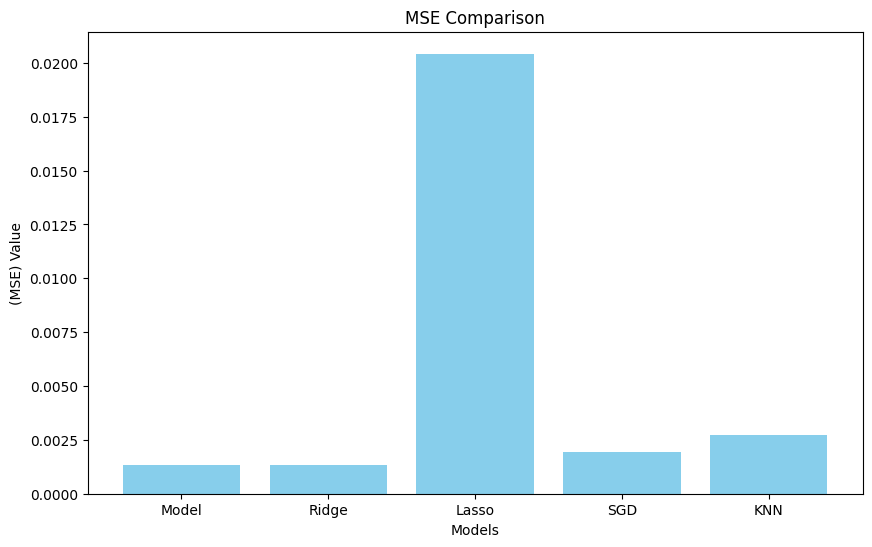

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, models_mse_values, color='skyblue')
plt.title('MSE Comparison')
plt.xlabel('Models')
plt.ylabel('(MSE) Value')
plt.show()

In [42]:
voting_regressor = VotingRegressor(estimators =[('linear Model', Linear_Model),('ridge', ridge_reg),('lasso',lasso),('sgd', sgd), ('knn_model',knn_model)])
voting_regressor.fit(X_train,Y_train)
y_pred_vote=voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_pred_vote, Y_test)
print("MSE voting", mse_voting)

MSE voting 0.002322898148578597


In [43]:
rfg=RandomForestRegressor()
rfg.fit(X_train,Y_train)
rfg_y_pred =rfg.predict(X_test)
mse_rfg= mean_squared_error(rfg_y_pred, Y_test)
mse_rfg

0.0002830551010160679

In [44]:
base_models = [('linear', Linear_Model),('ridge', ridge_reg),('lasso',lasso),('sgd', sgd), ('knn_model',knn_model)]
meta_model = RandomForestRegressor(n_estimators = 100 , random_state = 45)
stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train , Y_train)
y_pred = stacking_regressor.predict (X_test)
mse_stacking_value = mean_squared_error (y_pred , Y_test)
mse_stacking_value

0.001137246117543584

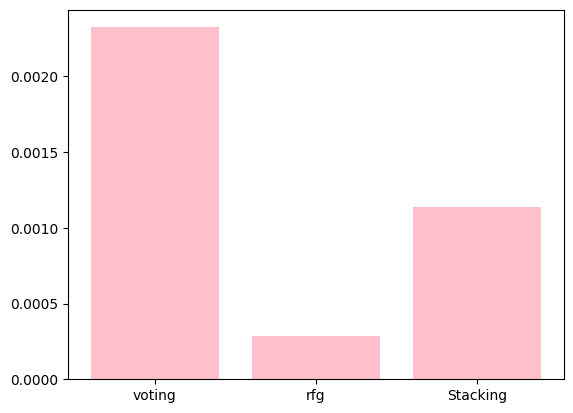

In [45]:
Models = ['voting','rfg','Stacking']
mse_values = [ mse_voting , mse_rfg , mse_stacking_value ]
plt.bar(Models, mse_values , color ='pink')
plt.show()

**NN Regression**

In [46]:
model = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='sgd',
    max_iter=500,
    random_state=42
)

In [47]:
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42,
             solver='sgd')

In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:4f}")
print(f"Mean abdolute error:{mae:4f} ")
print(f"R-squared (R2): {r2:4f}")

Mean Squared Error (MSE): 0.004230
Mean abdolute error:0.051709 
R-squared (R2): 0.792389


In [50]:
model2 = MLPRegressor(
    hidden_layer_sizes=(128,128,64,64),
    activation='logistic',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

In [51]:
model2.fit(X_train, Y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(128, 128, 64, 64),
             max_iter=1000, random_state=42, solver='lbfgs')

In [52]:
y_pred2 = model2.predict(X_test)

In [53]:
mse = mean_squared_error(Y_test, y_pred2)
r2 = r2_score(Y_test, y_pred2)
mae = mean_absolute_error(Y_test, y_pred2)
print(f"Mean Squared Error (MSE): {mse:4f}")
print(f"Mean abdolute error:{mae:4f} ")
print(f"R-squared : {r2:4f}")

Mean Squared Error (MSE): 0.020423
Mean abdolute error:0.112468 
R-squared : -0.002269


Kaggle

In [54]:
train_data = pd.read_csv('/content/Loan(4).csv')

In [55]:
test_data = pd.read_csv('/content/Regression_test_file.csv')

In [56]:
train_data.drop(columns=["ApplicationDate"], inplace=True)

test_data.drop(columns=["ApplicationDate"], inplace=True)

X_train = train_data.drop(columns=["RiskScore"])
y_train = train_data["RiskScore"]
X_test = test_data

# Encode all categorical columns
label_encoders = {col: LabelEncoder().fit(X_train[col]) for col in X_train.select_dtypes(include="object").columns}
for col, le in label_encoders.items():
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [57]:
model_trial = MLPRegressor(
    hidden_layer_sizes=(200, 164, 128, 68),
    activation='relu',
    solver='adam',
    max_iter=2000,
    alpha=0.0001,
    learning_rate='adaptive')
model_trial.fit(X_train,y_train)
predictions = model_trial.predict(X_test)
fsubmission1 = pd.DataFrame({
  "ID": range(len(predictions)),
  "RiskScore": predictions})

fsubmission1.to_csv("fsubmission1.csv", index=False)

print("Submissions file saved as 'fsubmission1.csv'")

In [58]:
model_trial1 = MLPRegressor(
    hidden_layer_sizes=(512, 256, 128, 64),
    activation='relu',
    solver='adam',
    max_iter=1000,
    alpha=0.0001,
    learning_rate='adaptive',
    learning_rate_init=0.0005,)
model_trial1.fit(X_train,y_train)
predictions = model_trial1.predict(X_test)
# Generate submission file
fsubmission2 = pd.DataFrame({
    "ID": range(len(predictions)),
    "RiskScore": predictions})

fsubmission2.to_csv("fsubmission2.csv", index=False)

print("Submissions file saved as 'fsubmission2.csv'")


In [59]:
model_trial2 = MLPRegressor(
    hidden_layer_sizes=(180 ,160 ,134, 64),
    activation='logistic',
    solver='adam',
    max_iter=3000)
model_trial2.fit(X_train, y_train)

predictions = model_trial2.predict(X_test)

fsubmission3 = pd.DataFrame({
    "ID": range(len(predictions)),
    "RiskScore": predictions
})

fsubmission3.to_csv("fsubmission3.csv", index=False)

print("Submissions file saved as 'fsubmission3.csv'")


In [60]:
model_trial3 = MLPRegressor(
    hidden_layer_sizes=(256, 200 , 164, 120 , 68),
    activation='relu',
    solver='adam',
    max_iter=1000,
    alpha=0.0001,
    learning_rate='adaptive')

model_trial3.fit(X_train,y_train)
predictions = model_trial3.predict(X_test)
fsubmission4 = pd.DataFrame({
  "ID": range(len(predictions)),
  "RiskScore": predictions})

fsubmission4.to_csv("fsubmission4.csv", index=False)

print("Submissions file saved as 'fsubmission4.csv'")